# LeNet Lab

![](image/lenet.png)

## Load and Preprocess Data

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets('.', reshape=False)

train_features, train_labels = mnist.train.images, mnist.train.labels
validation_features, validation_labels = mnist.validation.images, mnist.validation.labels
test_features, test_labels = mnist.test.images, mnist.test.labels

Extracting ./train-images-idx3-ubyte.gz
Extracting ./train-labels-idx1-ubyte.gz
Extracting ./t10k-images-idx3-ubyte.gz
Extracting ./t10k-labels-idx1-ubyte.gz


MNIST data in 28x28x1, but LeNet accepts 32x32xC images, so we need to pad data with zeros, 2 for each side. 

In [3]:
import numpy as np 

train_features = np.pad(train_features, ((0,0),(2,2),(2,2),(0,0)), 'constant')
validation_features = np.pad(validation_features, ((0,0),(2,2),(2,2),(0,0)), 'constant')
test_features = np.pad(test_features, ((0,0),(2,2),(2,2),(0,0)), 'constant')

## Visualize Data

3


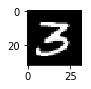

In [4]:
import random
import matplotlib.pyplot as plt 
%matplotlib inline 

index = random.randint(0, len(train_features))
image = train_features[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")
print(train_labels[index])

In [5]:
import tensorflow as tf
EPOCHS = 50
BATCH_SIZE = 128

## Implement LeNet-5
Implement the [LeNet-5](http://yann.lecun.com/exdb/lenet/) neural network architecture.

### Input
The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels. Since MNIST images are grayscale, C is 1 in this case.

### Architecture
**Layer 1: Convolutional.** The output shape should be 28x28x6.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 14x14x6.

**Layer 2: Convolutional.** The output shape should be 10x10x16.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 5x5x16.

**Flatten.** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using `tf.contrib.layers.flatten`, which is already imported for you.

**Layer 3: Fully Connected.** This should have 120 outputs.

**Activation.** Your choice of activation function.

**Layer 4: Fully Connected.** This should have 84 outputs.

**Activation.** Your choice of activation function.

**Layer 5: Fully Connected (Logits).** This should have 10 outputs.

### Output
Return the result of the 2nd fully connected layer.

In [13]:
from tensorflow.contrib.layers import flatten

def LeNet(input_data):
    # arguments for random normal distribution for initializing weights
    mu = 0
    sigma = 0.1
    
    weights = {
        'conv1': tf.Variable(tf.truncated_normal([5,5,1,6], mean=mu, stddev=sigma)),
        'conv2': tf.Variable(tf.truncated_normal([5,5,6,16], mean=mu, stddev=sigma)),
        'fc1': tf.Variable(tf.truncated_normal([400, 120], mean=mu, stddev=sigma)),
        'fc2': tf.Variable(tf.truncated_normal([120, 84], mean=mu, stddev=sigma)),
        'out': tf.Variable(tf.truncated_normal([84, 10], mean=mu, stddev=sigma))
    }
    
    biases = {
        'conv1': tf.Variable(tf.truncated_normal([6])),
        'conv2': tf.Variable(tf.truncated_normal([16])),
        'fc1': tf.Variable(tf.truncated_normal([120])),
        'fc2': tf.Variable(tf.truncated_normal([84])),
        'out': tf.Variable(tf.truncated_normal([10]))
    }
    
    pool_size = [1,2,2,1]
    conv_strides = [1,1,1,1]
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    Z1 = tf.nn.conv2d(input_data, weights['conv1'], strides=conv_strides, padding='VALID')
    Z1 = tf.nn.bias_add(Z1, biases['conv1'])

    # Activation.
    A1 = tf.nn.sigmoid(Z1)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    P1 = tf.nn.max_pool(A1, ksize=pool_size, strides=pool_size, padding='SAME')

    # Layer 2: Convolutional. Output = 10x10x16.
    Z2 = tf.nn.conv2d(P1, weights['conv2'], strides=conv_strides, padding='VALID')
    Z2 = tf.nn.bias_add(Z2, biases['conv2'])
    
    # Activation.
    A2 = tf.nn.sigmoid(Z2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    P2 = tf.nn.max_pool(A2, ksize=pool_size, strides=pool_size, padding='SAME')

    # Flatten. Input = 5x5x16. Output = 400.
    flat = flatten(P2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    FC1 = tf.add(tf.matmul(flat, weights['fc1']), biases['fc1'])
    
    # Activation.
    A3 = tf.nn.sigmoid(FC1)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    FC2 = tf.add(tf.matmul(A3, weights['fc2']), biases['fc2'])
    
    # Activation.
    A4 = tf.nn.sigmoid(FC2)

    # Layer 5: Fully Connected. Input = 84. Output = 10.
    logits = tf.add(tf.matmul(A4, weights['out']), biases['out'])
    
    return logits

## Features and Labels
Train LeNet to classify [MNIST](http://yann.lecun.com/exdb/mnist/) data.

`x` is a placeholder for a batch of input images.
`y` is a placeholder for a batch of output labels.

In [14]:
x = tf.placeholder(tf.float32, (None, 32,32,1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 10)

## Training Pipeline

In [15]:
learning_rate = .001

logits = LeNet(x)
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

## Evaluate With Accuracy and Loss

In [16]:
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
saver = tf.train.Saver()

## Train the Model

In [17]:
from sklearn.utils import shuffle

with tf.Session() as sess: 
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(EPOCHS):
        train_features, train_labels = shuffle(train_features, train_labels)
        for batch_start in range(0, len(train_features), BATCH_SIZE):
            batch_end = batch_start+BATCH_SIZE
            batch_x, batch_y = train_features[batch_start:batch_end], train_labels[batch_start:batch_end]
            sess.run(optimizer, feed_dict={x: batch_x, y:batch_y})
            
        valid_acc = sess.run(accuracy, feed_dict={x: validation_features, y: validation_labels})
        print("EPOCH {} Validation Accuracy = {:.3f}".format(epoch+1, valid_acc))
        
    saver.save(sess, './lenet')
    print("Model saved")

EPOCH 1 Validation Accuracy = 0.870
EPOCH 2 Validation Accuracy = 0.945
EPOCH 3 Validation Accuracy = 0.964
EPOCH 4 Validation Accuracy = 0.972
EPOCH 5 Validation Accuracy = 0.976
EPOCH 6 Validation Accuracy = 0.977
EPOCH 7 Validation Accuracy = 0.981
EPOCH 8 Validation Accuracy = 0.981
EPOCH 9 Validation Accuracy = 0.981
EPOCH 10 Validation Accuracy = 0.982
EPOCH 11 Validation Accuracy = 0.980
EPOCH 12 Validation Accuracy = 0.985
EPOCH 13 Validation Accuracy = 0.986
EPOCH 14 Validation Accuracy = 0.988
EPOCH 15 Validation Accuracy = 0.984
EPOCH 16 Validation Accuracy = 0.988
EPOCH 17 Validation Accuracy = 0.987
EPOCH 18 Validation Accuracy = 0.986
EPOCH 19 Validation Accuracy = 0.987
EPOCH 20 Validation Accuracy = 0.989
EPOCH 21 Validation Accuracy = 0.988
EPOCH 22 Validation Accuracy = 0.987
EPOCH 23 Validation Accuracy = 0.987
EPOCH 24 Validation Accuracy = 0.988
EPOCH 25 Validation Accuracy = 0.989
EPOCH 26 Validation Accuracy = 0.990
EPOCH 27 Validation Accuracy = 0.989
EPOCH 28 V

## Evaluate the Model

In [18]:
with tf.Session() as sess: 
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    test_acc = sess.run(accuracy, feed_dict={x: test_features, y: test_labels})
    print("Test Accuracy = {:.3f}".format(test_acc))

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.987
